In [103]:
# Importing models

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statistics

pd.set_option('display.max_columns', None)

In [53]:
# Readin data
df_telecom_raw = pd.read_csv("../0 - data/telecom_churn.csv")

# Changing churn variable
df_telecom_raw['Churn'] = df_telecom_raw['Churn'].map({1:True, 0:False})

#### Last check tha first 4 rows

In [54]:
df_telecom_raw.head(4)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,False,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,False,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,False,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,False,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6


In [55]:
# Descriptive analytics
df_telecom_raw.describe()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [110]:
# Number of churns 
df_telecom_raw.Churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: Churn, dtype: float64

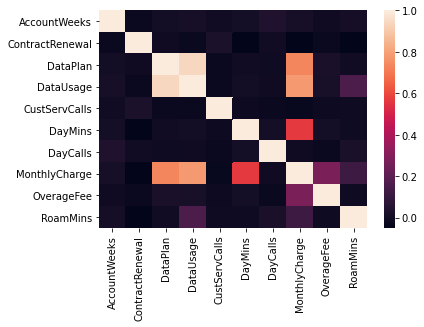

In [56]:
# Seek for linear correlation between data
sns.heatmap(df_telecom_raw.drop(columns=['Churn']).corr());

* As we can see, 'MonthlyCharge' has high linear correlation with 'DataPlan' and 'Data Usage' (0.74, 0.78), and medium correalation with 'DayMins' (0.57). It's a good approach get rid of MonthlyCharge feature. 

* The feature 'DataUsage' and 'DataPlan' has a near 1 linear correlation score (0.94). Once the 'DataPlan' feature is a categorical feature (1 means the customer has a mobile data plan, 0 means the opposite) let's keep the numerical feature. 


In [79]:
# Keep only features we want
df_telecom = df_telecom_raw.copy()
df_telecom.drop(columns=['MonthlyCharge', 'DataPlan'], inplace=True)

In [106]:
# Checkin the statistics for each group
df_telecom.groupby(['Churn']).agg(['mean', statistics.stdev, statistics.variance]).T

Churn                           False        True 
AccountWeeks    mean       100.793684   102.664596
                stdev       39.882350    39.467820
                variance  1590.601855  1557.708848
ContractRenewal mean         0.934737     0.716356
                stdev        0.247033     0.451233
                variance     0.061025     0.203612
DataUsage       mean         0.862151     0.546957
                stdev        1.286095     1.155352
                variance     1.654041     1.334837
CustServCalls   mean         1.449825     2.229814
                stdev        1.163883     1.853275
                variance     1.354624     3.434628
DayMins         mean       175.175754   206.914079
                stdev       50.181655    68.997792
                variance  2518.198517  4760.695237
DayCalls        mean       100.283158   101.335404
                stdev       19.801157    21.582307
                variance   392.085817   465.795985
OverageFee      mean         9.954618    10.623085
                stdev        2.514629     2.586433
                variance     6.323361     6.689635
RoamMins        mean        10.158877    10.700000
                stdev        2.784489     2.793190
                variance     7.753380     7.801909

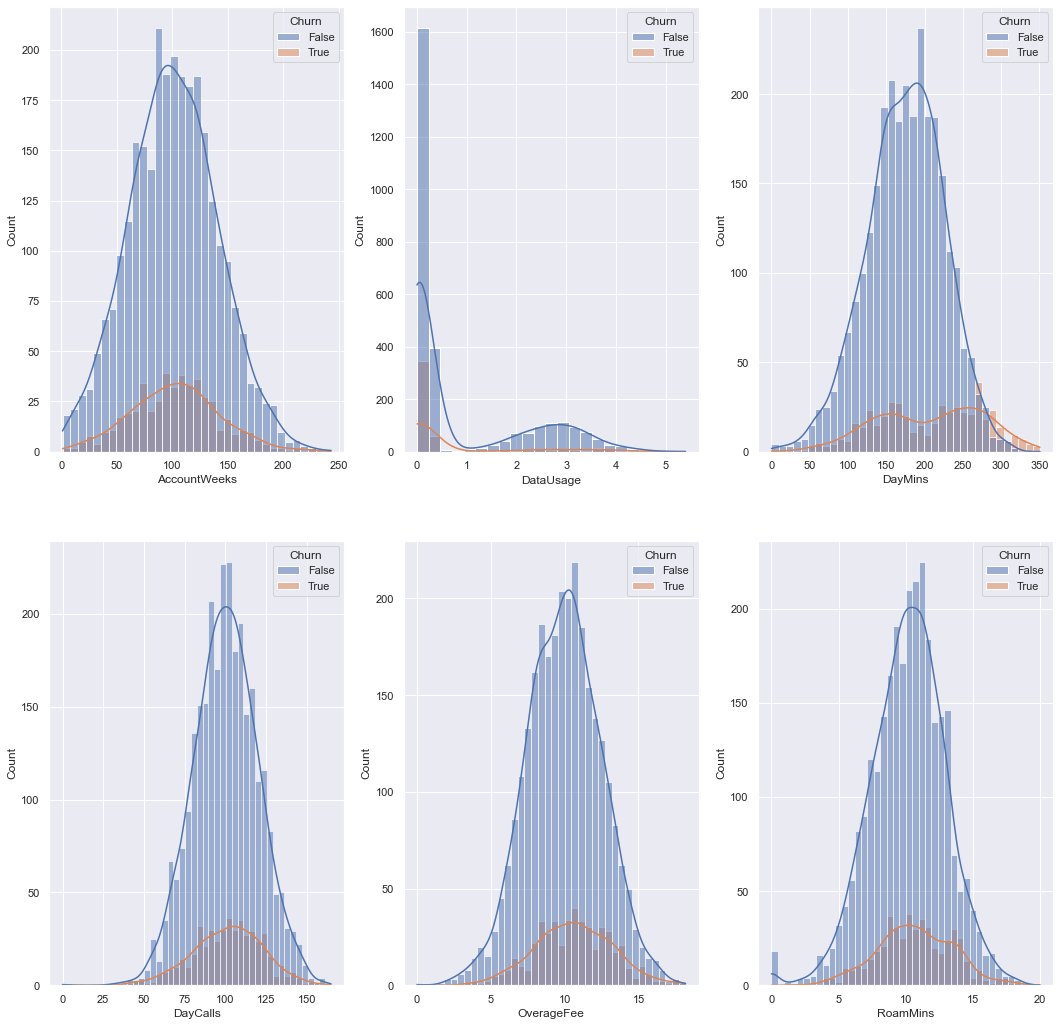

In [81]:
# analysing the distribuitions of our data
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

# setting the figure
fig, axs = plt.subplots(2, 3, figsize=(18, 18))

sns.histplot(data=df_telecom, x="AccountWeeks", kde=True, hue="Churn", ax=axs[0, 0])
sns.histplot(data=df_telecom, x="DataUsage", kde=True, hue="Churn", ax=axs[0, 1])
sns.histplot(data=df_telecom, x="DayMins", kde=True, hue="Churn", ax=axs[0, 2])
sns.histplot(data=df_telecom, x="DayCalls", kde=True, hue="Churn", ax=axs[1, 0])
sns.histplot(data=df_telecom, x="OverageFee", kde=True, hue="Churn", ax=axs[1, 1])
sns.histplot(data=df_telecom, x="RoamMins", kde=True, hue="Churn", ax=axs[1, 2])

plt.show()

In [108]:
# saving data 
df_telecom.to_csv('../0 - data/telecom_churn_cleaned.csv', index=False)